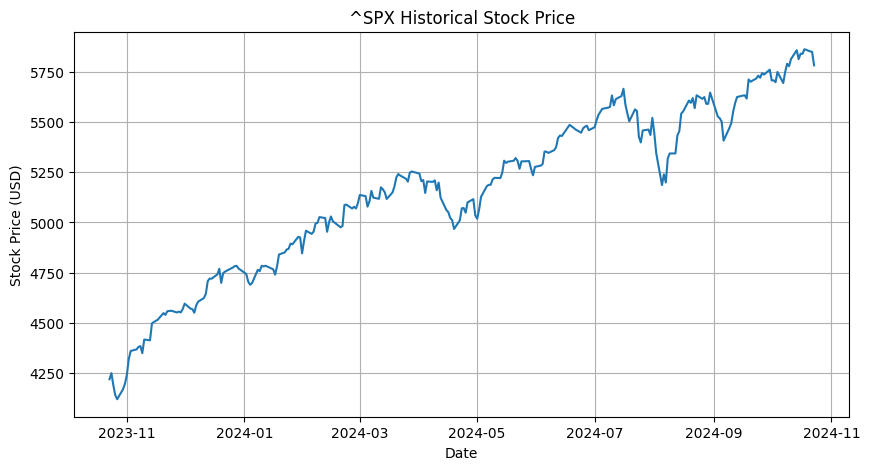

In [44]:
import yfinance as yf
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go
from datetime import datetime
import seaborn as sns

def fetch_options_data(ticker_symbol, expiration_date):
    ticker = yf.Ticker(ticker_symbol)
    options_dates = ticker.options
    # We'll use the nearest expiry date for our analysis
    options_data = ticker.option_chain(options_dates[expiration_date])
    return options_data.calls, options_data.puts

def fetch_historical_stock_data(ticker_symbol, period="1y"):
    ticker = yf.Ticker(ticker_symbol)
    stock_data = ticker.history(period=period)
    
    if stock_data.empty:
        raise ValueError(f"No historical stock data found for ticker '{ticker_symbol}'.")
    return stock_data

ticker_symbol = "^SPX"

stock_data = fetch_historical_stock_data(ticker_symbol, period="1y")

plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'])
plt.title(f'{ticker_symbol} Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)


In [45]:
# Fetch available expiration dates
ticker = yf.Ticker(ticker_symbol)
expiration_dates = ticker.options

# Print all available expiration dates
print("Available Expiration Dates for SPX:")
for date in expiration_dates:
    print(date)


EXPIRATION_DATE_INDEX = 20
expiration_in_one_month = expiration_dates[EXPIRATION_DATE_INDEX]  # Adjust the index as necessary

# Print the selected expiration date
print(f"\nFetching options for expiration date: {expiration_in_one_month}")

Available Expiration Dates for SPX:
2024-10-23
2024-10-24
2024-10-25
2024-10-28
2024-10-29
2024-10-30
2024-10-31
2024-11-01
2024-11-04
2024-11-05
2024-11-06
2024-11-07
2024-11-08
2024-11-11
2024-11-12
2024-11-13
2024-11-14
2024-11-15
2024-11-18
2024-11-19
2024-11-20
2024-11-21
2024-11-22
2024-11-25
2024-11-26
2024-11-29
2024-12-06
2024-12-20
2024-12-31
2025-01-17
2025-01-31
2025-02-21
2025-02-28
2025-03-21
2025-03-31
2025-04-17
2025-05-16
2025-06-20
2025-06-30
2025-07-18
2025-08-15
2025-09-19
2025-09-30
2025-10-17
2025-11-21
2025-12-19
2026-01-16
2026-03-20
2026-06-18
2026-12-18
2027-12-17
2028-12-15
2029-12-21

Fetching options for expiration date: 2024-11-20


         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0   SPXW241120C05300000 2024-10-14 18:50:55+00:00  5300.0     603.00  512.80   
1   SPXW241120C05350000 2024-10-14 18:50:55+00:00  5350.0     555.80  465.90   
2   SPXW241120C05700000 2024-10-18 19:18:21+00:00  5700.0     229.54  170.60   
3   SPXW241120C05720000 2024-10-21 19:01:56+00:00  5720.0     195.25  156.50   
4   SPXW241120C05725000 2024-10-16 13:42:21+00:00  5725.0     186.59  153.40   
5   SPXW241120C05730000 2024-10-15 20:05:15+00:00  5730.0     184.66  149.50   
6   SPXW241120C05740000 2024-10-22 14:22:30+00:00  5740.0     173.71  142.70   
7   SPXW241120C05750000 2024-10-22 14:10:28+00:00  5750.0     162.80  135.90   
8   SPXW241120C05760000 2024-10-17 13:30:05+00:00  5760.0     203.68  129.40   
9   SPXW241120C05780000 2024-10-16 15:26:19+00:00  5780.0     152.14  116.30   
10  SPXW241120C05800000 2024-10-15 18:29:21+00:00  5800.0     122.43  104.00   
11  SPXW241120C05810000 2024-10-16 18:55

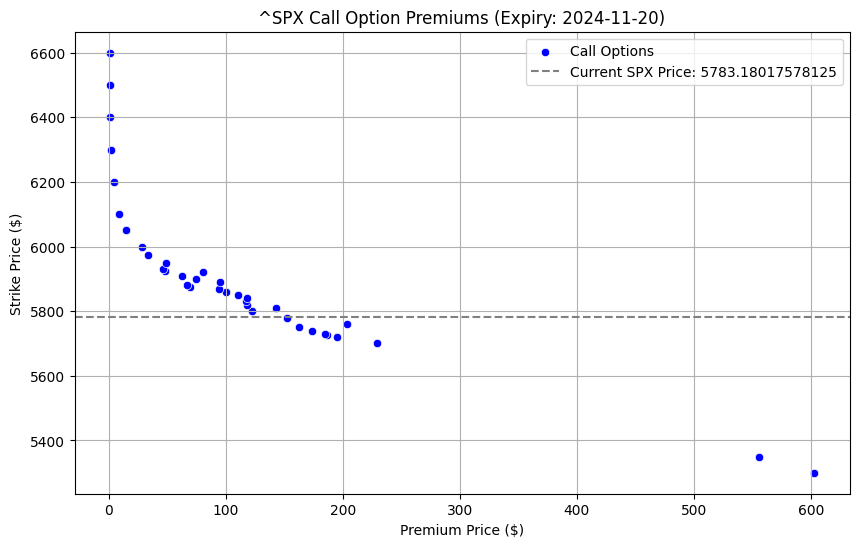

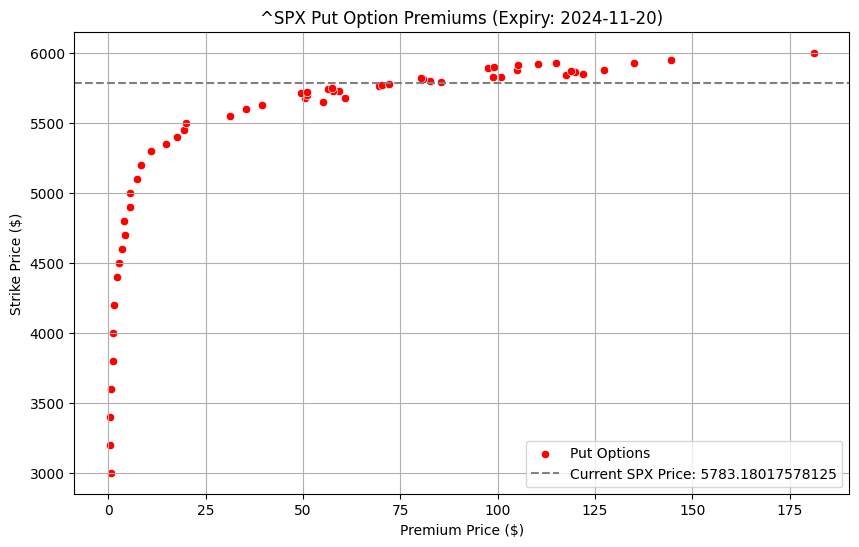

Plotting option premiums for expiration date: 2024-11-20
Current SPX Price: 5783.18017578125
Note: The 'lastPrice' represents the most recent trade, which may not always be from today. Check 'volume' for recent trading activity.



In [49]:
def fetch_current_stock_price(ticker_symbol):
    """
    Fetches the current stock price for the given ticker symbol.
    
    Parameters:
    - ticker_symbol (str): The ticker symbol (e.g., 'SPX')
    
    Returns:
    - current_price (float): The latest stock price
    """
    ticker = yf.Ticker(ticker_symbol)
    stock_data = ticker.history(period="1d")
    current_price = stock_data['Close'].iloc[-1]  # Get the most recent closing price
    return current_price

spx_calls, spx_puts = fetch_options_data(ticker_symbol, EXPIRATION_DATE_INDEX)

#print(spx_calls)

# Fetch the current stock price
current_stock_price = fetch_current_stock_price(ticker_symbol)
print(current_stock_price)

# Plot Call Option Premiums for SPX with a horizontal line for the current stock price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spx_calls, x='lastPrice', y='strike', color='blue', label='Call Options')
plt.axhline(y=current_stock_price, color='gray', linestyle='--', label=f'Current SPX Price: {current_stock_price}')
plt.title(f'{ticker_symbol} Call Option Premiums (Expiry: {expiration_in_one_month})')
plt.xlabel('Premium Price ($)')
plt.ylabel('Strike Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Put Option Premiums for SPX with a horizontal line for the current stock price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spx_puts, x='lastPrice', y='strike', color='red', label='Put Options')
plt.axhline(y=current_stock_price, color='gray', linestyle='--', label=f'Current SPX Price: {current_stock_price}')
plt.title(f'{ticker_symbol} Put Option Premiums (Expiry: {expiration_in_one_month})')
plt.xlabel('Premium Price ($)')
plt.ylabel('Strike Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Print the expiration date for clarity
print(f"Plotting option premiums for expiration date: {expiration_in_one_month}")
print(f"Current SPX Price: {current_stock_price}")
print("Note: The 'lastPrice' represents the most recent trade, which may not always be from today. Check 'volume' for recent trading activity.\n")

In [48]:
def calculate_historical_volatility(stock_data, window=252):
    log_returns = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
    volatility = np.sqrt(window) * log_returns.std()
    return volatility

volatility = calculate_historical_volatility(stock_data)
print(f"{ticker_symbol} Historical Volatility: {jpm_volatility}")

# Fetch data for the 13-week T-bill (^IRX is the ticker for the 13-week Treasury Bill index on Yahoo Finance)
t_bill = yf.Ticker("^IRX")
t_bill_data = t_bill.history(period="1d")

# The yield is typically expressed as an annual percentage, so divide by 100
risk_free_rate = t_bill_data['Close'].iloc[-1] / 100
print(f"Estimated risk-free rate (3-month T-Bill): {risk_free_rate}")

^SPX Historical Volatility: 0.19909059366562598
Estimated risk-free rate (3-month T-Bill): 0.04508000373840332


In [6]:

class BlackScholesModel:
    def __init__(self, S, K, T, r, sigma):
        self.S = S        # Underlying asset price
        self.K = K        # Option strike price
        self.T = T        # Time to expiration in years
        self.r = r        # Risk-free interest rate
        self.sigma = sigma  # Volatility of the underlying asset

    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
    
    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)
    
    def call_option_price(self):
        return (self.S * si.norm.cdf(self.d1(), 0.0, 1.0) - self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0))
    
    def put_option_price(self):
        return (self.K * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0) - self.S * si.norm.cdf(-self.d1(), 0.0, 1.0))







Call Option Price: 10.450583572185565
Put Option Price: 5.573526022256971
JPM Historical Volatility: 0.19909059366562598


In [56]:
strike_prices_call = spx_calls['strike'].values
strike_prices_put =  spx_puts['strike'].values
print(len(strike_prices_call))
print(len(strike_prices_put))

call_premiums = []
put_premiums = []

assert len(strike_prices_call) == len(strike_prices_put)

print(f"Current stock price: {current_stock_price}")
# Loop through each strike price and calculate the call and put option premiums
for call_K, put_K in zip(strike_prices_call, strike_prices_put):
    bsm = BlackScholesModel(S=current_stock_price, K=K, T=1/12, r=risk_free_rate, sigma=volatility)
    call_premiums.append(bsm.call_option_price())
    put_premiums.append(bsm.put_option_price())

36
57


AssertionError: 